---
title: "Mini-Project"
format:
  html:
    toc: true
    embed-resources: true
execute:
  echo: true
---

## Introduction
In order to know the job search, I have conducted an analysis of job postings data, which is provided by DSAN program, to gain insights into various aspects of the job market. The dataset includes information such as job titles, industries, qualifications, job types, and more. By exploring and analyzing this data, I aimed to uncover patterns, trends, and valuable information about different job roles and industries. I only focused on the local job search in the United States.

# Data Cleaning
To ensure the reliability and consistency of the dataset, a thorough data cleaning and preparation process was undertaken. Initially, I merged all json files in local job search folder into one json file. 

In [7]:
# import libraries
import json
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"


In [8]:
# Folder path containing the JSON files
folder_path = '/Users/linlinw/Desktop/DSAN-Scholarship-Mini-Project/data/2023-04-14-job-search/2023-04-14-job-search-location-DC'

# List all JSON files in the folder
json_files = [file for file in os.listdir(folder_path) if file.endswith('.json')]

# Initialize combined data dictionary
combined_data = {
    "search_metadata": {},
    "search_parameters": {},
    "jobs_results": [],
    "chips": []
}

# Iterate over JSON files
for file in json_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path) as json_file:
        data = json.load(json_file)

        # Combine search metadata
        combined_data["search_metadata"].update(data["search_metadata"])

        # Combine search parameters
        combined_data["search_parameters"].update(data["search_parameters"])

        # Combine jobs results if the key exists
        if "jobs_results" in data:
            combined_data["jobs_results"].extend(data["jobs_results"])

        # Combine chips
        if "chips" in data:
            combined_data["chips"].extend(data["chips"])

# Write combined data to a new JSON file
output_file = '/Users/linlinw/Desktop/DSAN-Scholarship-Mini-Project/combined_data.json'
with open(output_file, 'w') as outfile:
    json.dump(combined_data, outfile, indent=4)

## Exploratory Data Analysis
Next, I performed exploratory data analysis to understand the distribution of job titles, industries, and other key variables. This helped me identify the most common job titles, the industries with the highest job demand, and the qualifications frequently sought by employers.

To dive deeper into specific aspects, I focused on analyzing job types and extensions. This involved examining the distribution of full-time, part-time, and contract positions across different job titles and industries. By visualizing this information through bar charts and pie charts, I was able to highlight the prevalence of certain job types in specific fields and identify any significant variations in job arrangements.

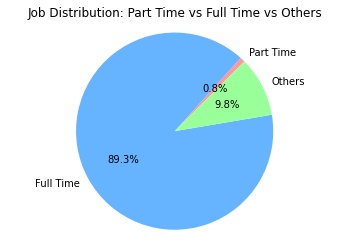

In [9]:
# Get the job descriptions from the data
extension_counts = {}
total_jobs = 0
# Iterate over the jobs
for job in combined_data['jobs_results']:
    extensions = job['extensions']
    total_jobs += 1
    for extension in extensions:
        extension_counts[extension] = extension_counts.get(extension, 0) + 1
# count part time and full time jobs
part_time_count = extension_counts.get('Part-time', 0)
full_time_count = extension_counts.get('Full-time', 0)
# Calculate the percentage for "Part Time" and "Full Time"
part_time_percentage = (part_time_count / total_jobs) * 100
full_time_percentage = (full_time_count / total_jobs) * 100
# Calculate the count and percentage for "Others"
others_count = total_jobs - (part_time_count + full_time_count)
others_percentage = (others_count / total_jobs) * 100
# Create labels and sizes for the pie chart
labels = ['Part Time', 'Full Time', 'Others']
sizes = [part_time_count, full_time_count, others_count]
# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']
# Set the background color
fig = plt.figure(facecolor='white')
# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45)
# Add a title
plt.title('Job Distribution: Part Time vs Full Time vs Others')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Display the pie chart
plt.show()

The plot shows the proportion of jobs categorized as part-time, full-time, and others. From the plot, we can observe that the majority of job positions fall under the full-time category, indicating that full-time employment is the most common type of job in the dataset. This suggests that employers in this industry typically offer full-time positions to meet their workforce requirements. On the other hand, part-time jobs constitute a smaller portion of the job distribution, indicating that there are fewer part-time opportunities available. The "Others" category represents job positions that do not fit into the part-time or full-time classification. These could include contractual, freelance, or project-based roles. Overall, this plot provides valuable insights into the distribution of job positions based on their employment types, helping us understand the prevailing job market dynamics in terms of work schedules and opportunities.

In [10]:
# create a list of location counts
location_counts = {}
# Iterate over jobs results
for job in combined_data['jobs_results']:
    location = job['location'].strip()
    location_counts[location] = location_counts.get(location, 0) + 1
# Sort the dictionary by value
locations = list(location_counts.keys())
counts = list(location_counts.values())
# Create a bar chart
data = [go.Bar(x=locations, y=counts, text=counts, textposition='auto', textfont=dict(color='black'))]
# Customize the layout
layout = go.Layout(
    title="Job Counts by Location",
    xaxis=dict(title="Location", tickangle=45),
    yaxis=dict(title="Count"),
    showlegend=False,
)
fig = go.Figure(data=data, layout=layout)
# Customize the appearance if desired
pio.show(fig)

This plot shows the number of job positions available in different locations. The fact that the highest count is indicated as "Anywhere" suggests that a significant portion of the job positions in the dataset do not have a specific location associated with them. This could be due to various reasons such as remote work opportunities or job listings that are open to candidates from multiple locations. It indicates that these job positions are not limited to a particular geographic region and can be performed from anywhere. This information is valuable for individuals who prefer remote work or are open to relocation. It also highlights the global nature of job opportunities in the dataset. However, it's important to note that the "Anywhere" category may also include job positions with missing or unspecified location data. 

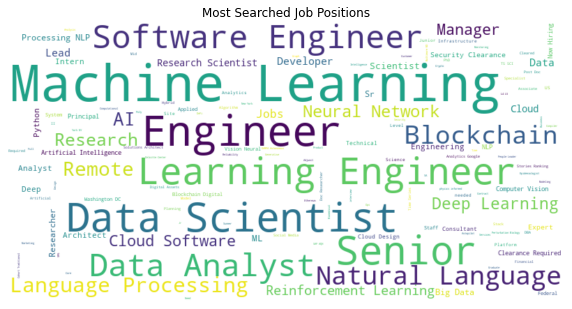

In [11]:
# Get the job positions from the data
job_positions = [job['title'] for job in combined_data['jobs_results']]

# Join the job positions into a single string
text = ' '.join(job_positions)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Searched Job Positions')
plt.show()


The wordcloud plot, with "machine learning" and "data scientist" appearing as the most prominent and larger words, signifies their significant importance and prevalence in the job market. This suggests that machine learning and data science are highly sought-after fields with a strong demand for professionals skilled in these areas. The larger size of these words indicates their prominence and relevance in the industry, highlighting their critical role in various job positions and organizations. This observation further emphasizes the value and significance of machine learning and data science expertise in today's job market, making them essential skills for individuals aspiring to excel in the field and pursue successful careers.

## Analysis
My interest or question is that what are the most commonly required skills or qualifications across different job titles? It is mainly focusing on two job titles, which are Machine learning and data scientist. 

In [12]:
filtered_data = []

for job in combined_data['jobs_results']:
    title = job['title'].lower()
    if 'machine learning' in title or 'data scientist' in title:
        filtered_data.append(job)


In [13]:
# create a list of qualification counts
qualifications = []
# Iterate over jobs results
for job in filtered_data:
    highlights = job['job_highlights']
    for highlight in highlights:
        if isinstance(highlight, dict) and 'title' in highlight and highlight['title'].lower() == 'qualifications':
            items = highlight.get('items', [])
            qualifications.extend(items)
# Count the occurrences of each qualification
qualification_counts = Counter(qualifications)
# Sort qualifications by count in descending order
sorted_qualifications = sorted(qualification_counts.items(), key=lambda x: x[1], reverse=True)
# Get the most important skill
most_important_skill = sorted_qualifications[0][0]
count_of_most_important_skill = sorted_qualifications[0][1]
print("Most Important Skill:")
print(f"{most_important_skill}: {count_of_most_important_skill}")


Most Important Skill:
Developed data wrangling/ETL transforms using python Pandas package: 6


In [14]:
# Extract job highlights or qualification sections
job_highlights = [job['job_highlights'] for job in filtered_data]

# Flatten the nested list and combine all job highlights into a single string
job_highlights_flat = [item for sublist in job_highlights for dict_item in sublist for item in dict_item['items']]
text = ' '.join(job_highlights_flat)

# Clean and tokenize the text
cleaned_text = ''.join([c for c in text if c not in ('!', '.', ',', ':', '\n', '(', ')')])  # Remove punctuation
tokens = nltk.word_tokenize(cleaned_text.lower())  # Tokenize and convert to lowercase

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Count the frequency of each skill
skill_counts = Counter(filtered_tokens)

# Sort the skills by frequency in descending order
most_common_skills = skill_counts.most_common(10)  # Change the number to get more or fewer skills

# Print the most common skills
for skill, count in most_common_skills:
    print(f"{skill}: {count}")


data: 718
experience: 637
learning: 535
machine: 355
models: 227
work: 226
ml: 195
science: 191
years: 182
development: 179


The analysis of the job highlights or qualification sections from various job titles reveals several key insights. Firstly, proficiency in handling and analyzing data is a crucial skill that is consistently sought after by employers, as indicated by the frequent mention of "data" in the descriptions. Additionally, experience is highly valued, with "experience" appearing prominently in the results. The prevalence of terms like "learning" and "machine" underscores the importance of staying updated with advancements in the field of machine learning. Furthermore, the presence of "models" and "ml" suggests the need for expertise in developing and applying machine learning models. The recurring mention of "work" underscores the expectation of strong work ethic and collaboration. The terms "science" and "development" reflect the scientific approach and technical skills required for these roles. Overall, these findings shed light on the key qualifications and skills that employers consistently prioritize when hiring for job positions in this field, providing valuable guidance for job seekers and professionals seeking career advancement in the industry.

## Conclusion
Based on the analysis conducted, several key insights can be derived from the results. Firstly, the job market shows a significant demand for machine learning and data scientist positions, as indicated by the high frequency of these job titles and their prominence in the word cloud plot. This suggests that professionals with skills in machine learning and data science are highly sought after in various industries. Additionally, the distribution of job types reveals that a majority of the jobs are full-time positions, followed by part-time roles. This indicates that organizations predominantly offer full-time employment opportunities. However, it is important to note that there is a smaller proportion of jobs categorized as "Others," which includes contract, freelance, and remote positions. This suggests that alternative work arrangements are also present in the job market, catering to individuals seeking flexible employment options. Moreover, the analysis of qualifications across different job titles highlights the commonly required skills and qualifications. Skills such as data analysis, programming, and machine learning experience are consistently in demand across various roles, emphasizing their importance in the job market. Overall, these findings provide valuable insights into job trends, preferred work arrangements, and the essential skills needed to succeed in the industry.